# Predicting the age from MRI-Scans
### Team orel, HS16, Machine Learing, Project 1
### Swaneet, Alessandra, Cristina

In [10]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.ensemble import BaggingRegressor
from IPython.display import Image
import csv

In [11]:
# declare useful variables
n_max = 278
n_test_max = 138
testpre = "set_test/test_"
trainpre = "set_train/train_"
# ages as read from targets.csv
y = np.array([20, 25, 61, 84, 23, 69, 83, 62, 72, 52, 52, 25, 19, 70, 26, 83, 83,73, 22, 21, 30, 30, 18, 68, 24, 22, 65, 80, 64, 24, 87, 80, 81, 72,23, 24, 70, 66, 22, 34, 82, 25, 23, 19, 20, 25, 23, 23, 71, 20, 86,81, 40, 57, 76, 84, 20, 18, 81, 74, 80, 41, 50, 88, 71, 82, 35, 23,88, 54, 44, 87, 80, 49, 48, 44, 21, 65, 78, 84, 48, 22, 43, 21, 31,23, 76, 39, 89, 21, 69, 60, 85, 23, 71, 48, 75, 78, 89, 51, 55, 22,73, 20, 74, 48, 18, 71, 78, 48, 74, 26, 75, 94, 49, 84, 22, 90, 26,81, 55, 80, 19, 20, 22, 77, 75, 37, 20, 72, 77, 29, 69, 74, 74, 64,80, 22, 90, 28, 21, 20, 85, 82, 71, 70, 21, 78, 87, 28, 46, 79, 24,54, 24, 51, 80, 78, 72, 93, 89, 75, 89, 58, 50, 58, 22, 96, 73, 78,28, 45, 18, 91, 20, 83, 43, 78, 71, 59, 83, 73, 64, 69, 20, 20, 28,86, 72, 90, 68, 90, 22, 67, 84, 48, 67, 78, 21, 54, 20, 22, 73, 20,27, 77, 72, 86, 33, 65, 31, 19, 65, 50, 27, 73, 50, 19, 80, 80, 88,55, 54, 72, 26, 80, 41, 81, 77, 79, 19, 71, 89, 88, 68, 20, 54, 23,22, 43, 21, 86, 81, 80, 22, 74, 55, 21, 20, 63, 51, 45, 46, 22, 23,80, 73, 84, 58, 20, 83, 67, 38, 26, 26, 77, 69, 24, 22, 26, 23, 20,54, 25, 55, 22, 23, 25])
y_t_pred = None
# one of our currently best predictions
y_best = [59.82692307692308, 75.538461538461533, 52.153846153846153, 81.865384615384613, 79.269230769230774, 76.230769230769226, 51.67307692307692, 52.519230769230766, 67.59615384615384, 55.28846153846154, 21.826923076923077, 54.230769230769234, 72.211538461538467, 30.0, 22.942307692307693, 67.557692307692307, 23.192307692307693, 77.538461538461533, 82.788461538461533, 83.615384615384613, 80.230769230769226, 23.25, 67.057692307692307, 82.807692307692307, 71.57692307692308, 44.32692307692308, 70.615384615384613, 20.884615384615383, 22.403846153846153, 31.71153846153846, 74.788461538461533, 42.192307692307693, 20.26923076923077, 23.096153846153847, 21.634615384615383, 58.519230769230766, 80.40384615384616, 79.07692307692308, 65.65384615384616, 83.519230769230774, 45.557692307692307, 72.07692307692308, 85.788461538461533, 33.942307692307693, 61.153846153846153, 65.384615384615387, 47.42307692307692, 23.25, 23.826923076923077, 64.90384615384616, 24.51923076923077, 77.92307692307692, 21.0, 53.115384615384613, 25.923076923076923, 87.211538461538467, 75.769230769230774, 76.34615384615384, 21.75, 38.596153846153847, 63.884615384615387, 75.17307692307692, 51.596153846153847, 56.653846153846153, 23.576923076923077, 33.884615384615387, 23.653846153846153, 26.923076923076923, 77.634615384615387, 82.442307692307693, 77.75, 77.25, 20.5, 21.673076923076923, 74.42307692307692, 76.0, 52.115384615384613, 64.42307692307692, 67.115384615384613, 31.23076923076923, 70.365384615384613, 78.365384615384613, 84.67307692307692, 32.46153846153846, 26.96153846153846, 85.057692307692307, 23.673076923076923, 45.865384615384613, 26.5, 75.34615384615384, 21.653846153846153, 72.980769230769226, 47.980769230769234, 21.51923076923077, 72.980769230769226, 88.461538461538467, 73.40384615384616, 74.365384615384613, 68.211538461538467, 59.769230769230766, 56.346153846153847, 49.115384615384613, 44.17307692307692, 85.557692307692307, 22.923076923076923, 23.03846153846154, 78.115384615384613, 28.846153846153847, 24.384615384615383, 60.846153846153847, 31.28846153846154, 26.21153846153846, 22.96153846153846, 70.90384615384616, 83.0, 25.653846153846153, 77.59615384615384, 69.75, 37.596153846153847, 36.884615384615387, 31.173076923076923, 21.5, 31.673076923076923, 34.153846153846153, 70.5, 28.71153846153846, 43.903846153846153, 54.653846153846153, 23.634615384615383, 82.692307692307693, 21.71153846153846, 38.82692307692308, 21.75, 22.423076923076923, 23.846153846153847, 21.134615384615383, 82.40384615384616, 82.884615384615387]
prefix=None
result = None
xa = []
x = None
x_t = None

def saveCSV(xs,filename):
  fname = filename + ".csv"
  f = open(fname,"wb")
  wr = csv.writer(f,delimiter=",")
  wr.writerow(["ID","PREDICTION"])
  wr.writerows( [ [i+1,age] for i,age in enumerate(xs) ] )
  f.close()
  return fname

In [12]:
space = 200 # number of bins in the histogram. 50 is smooth, 200 is a bit more accurate/noisy
# filename for output
name = "output/mean_var_mean_std_hist"+str(space)+"_idk_"
# filename where the statistical and histogram matrix is precomputed and saved
fname = "statistics_diff_hist" + str(space) + ".npy"
# filename where the histogram mean is precomputed and saved
fnameMeanHist = "mean_hist" + str(space) + ".npy"

# load the precomputed matrix and split it into the trianing and test data.
xa = np.load(fname)
x = xa[0:n_max,:]
x_t = xa[n_max:,:]

# As input for our model we create some basic statistics over each sample and a histogram over the voxels per sample
nPercentiles = 20 # numbe of percentiles to use
bStat = 7 # number of basic statistics. sum, sum of squares, sum of cubes, average, variance, index of mode and mode
bins = np.linspace(1,1900,space) # we use space-many bins from 1 to 1900. We ignore the black voxels at intensity 0
sbins = bins[:-1]+(bins[1]-bins[0])/2.0 #bins used to plot the data
ds = bStat + nPercentiles + space-1 # sum,sum2,sum3,avg,var,mode, numper of percentiles and histogram
iHist = bStat + nPercentiles

In [13]:
# fast function to compute the 3 powers of each element
def myloop(a):
    return (a,a*a,a*a*a)

myloopU = np.frompyfunc(myloop,1,3,dtype=np.float64)

# function to load the data sequentuially and proprocess and save the results
# only needed to execute once.
def loadAndPreprocess():
    global x,x_t
    xa = np.zeros((n_max+n_test_max,ds))
    hists = np.zeros((n_max+n_test_max,space-1))
    
    i = 0
    print "First loop. Calculate basic statistics and the absolute histogram"
    while i < n_max+n_test_max:
      if i % 5 == 0:
        print "Doing i = %s ..." % i
      
      n_i,pre,t_str = (n_max,"set_train/","train") if i < n_max else (n_test_max,"set_test/","test")
      filename = "%s%s_%s.nii" % (pre,t_str,i%n_max+1)
      data = nib.load(filename).get_data()
      #data=xa_org[i]
      sum = 0.0
      sum2 = 0.0
      sum3 = 0.0
      avg = 0.0
      var = 0.0
      data = data.ravel()
      res = myloopU(data)
      sum = np.sum(res[0])
      sum2 = np.sum(res[1])
      sum3 = np.sum(res[2])
      avg = sum / float(d_org)
      var = sum2 / float(d_org-1) - avg*avg
      hist = np.histogram(data,bins=bins)[0]
      percentiles = np.linspace(0,100,nPercentiles)
      iMax,hMax = max(enumerate(hist),key=lambda x:x[1])
      percs = np.percentile(hist,percentiles)
      xa[i,:bStat] = [sum,sqrt(sum2),pow(sum3,1/3.0),avg,var,iMax,hMax]
      xa[i,bStat:iHist] = percs
      hists[i] = hist
      i = i+1
    
    meanHist = np.mean(hists[:n_max,:],axis=0)
    
    np.save(fnameMeanHist,meanHist)
    print "Saved mean hist into into %s" % fnameMeanHist
    
    print "Second loop. Compute differences to mean-hisgtogram and save matrix"
    i = 0
    while i < n_max+n_test_max:
      xa[i,(bStat+nPercentiles):] = hists[i]-meanHist
      i=i+1
    
    np.save(fname,xa)
    print "Saved into %s" % fname
    x = xa[0:n_max]
    x_t=xa[n_max:]

In [14]:
# If you are on a new computer. Use this to precompute the .npy files. If you already have
# these files given, then there is no need to have the original mri data.
#loadAndPreprocess()

In [15]:
# after many different tries we ended up with this one.
# What we tried (chronological order):
"""
Flat data (6 million dimensions)
* Lasso,Ridge,KPCA,PCA -> too slow and inaccurate, best score was 450?
* zoom in into a lower resolution. and then flatten
  * tried out all above methods -> some too slow, others (Lasso) became as good as ~90
* We thoughtof how to reduce the dimensions. But PCA and SVD and co just need too much time.
* Maybe start simple with basic statistics?
* We started with average,stddev, and some basic statistics. Score was 84. Impressive, how good
  just these few statistics were.
* We tried to make it slightly more informative. So we calculated the histogram per sample.
* Using the histogram as input into various methods yielded up to 77 (!). It was interesting.
  * In all of the methods Lasso was simple and most-effective. So now we stayed to it.
* After learning about boosting we tried ada-boosting. Which brought us down to score 70.
* We were using Lasso inside Adaboosting - but when we realized that we can change it either
 we tried the default Decision Tree - is was effective. Ourscore went down to 64 (!)
* finally we changed to Bagging Ensemble. Tried Lasso and the default decision tree - the former leading to our
  best result of 58.
"""

def makeBaggingBoostDefaultDecisionTreePrediction(n_est):
  global y_t_pred,result
  print "Prediction #estimators = %s and Decision Trees" % (n_est)
  prefix = "%s_BaggingBoost_n_est%s_DefaultTree"%(name,n_est)
  model = BaggingRegressor(n_estimators=n_est)
  x1 = x[:,:] # use all data
  x_t1 = x_t[:,:] # use all data
  y_t_pred = model.fit(x1,y).predict(x_t1)
  r = model.score(x1,y)
  print("score r = %s"%r)
  return prefix,model

In [16]:
# main function which combines all
def doStuff(al=15,comps=n_max-1,kernel="rbf",n_est=120,maxfs=2):
  global prefix,result
  prefix,model = makeBaggingBoostDefaultDecisionTreePrediction(n_est=n_est)
  
  y_t_pred = savePrediction()
  
  visualize(y,y_t_pred,prefix)
  
  print " ========= x ========== \n%s\n" % x
  print " ========= y_t_pred ========== \n%s\n" % y_t_pred
  
  # retuns a colleciton of stuff to return
  print "Variables available in 'result'"
  result = (x,y,x_t,y_t_pred,y_t_pred,model)

def visualize(y,y_t_pred,prefix):
  print "\n === Histogram of the actual ages of training data and the predicted ages for test data === "
  ageBins = np.linspace(10,105,50)
  plt.hist(y,bins=ageBins,color="black",rwidth=0.65)
  #plt.hist(y_pred,color="darkgreen",rwidth=0.5)
  plt.hist(y_t_pred,bins=ageBins,color="blue",rwidth=0.4)
  plt.legend(["ages given for X",
    #"ages predicted for X",
    "ages predicted for X_t"])
  plt.savefig(prefix + "_histogram_ages.png")
  plt.show()
  plt.clf()
  plt.plot(np.array(y_t_pred)-np.array(y_best),"bo")
  plt.savefig(prefix + "_diff_to_score_61.png")
  print "============ Difference per age prediction to one of score 61 ============== "
  plt.show()
  plt.clf()
  plt.plot(sorted(y_t_pred),"bo")
  plt.savefig(prefix + "_sorted.png")
  print("Saved age diagrams as %s"%(prefix+"*.png"))
  print "======= Sorted age predictions for test data (to visualize the predictions) =========="
  plt.show()

def savePrediction():
    global y_t_pred
    savedFilename = saveCSV(y_t_pred,prefix)
    print("Saved predictions into %s" % savedFilename)
    return y_t_pred

Prediction #estimators = 52 and Decision Trees
score r = 0.985147255703
Saved predictions into output/mean_var_mean_std_hist200_idk__BaggingBoost_n_est52_DefaultTree.csv

 === Histogram of the actual ages of training data and the predicted ages for test data === 


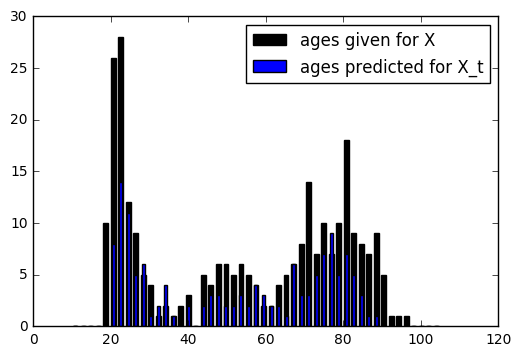

============ Difference per age prediction to one of score 61 ============== 


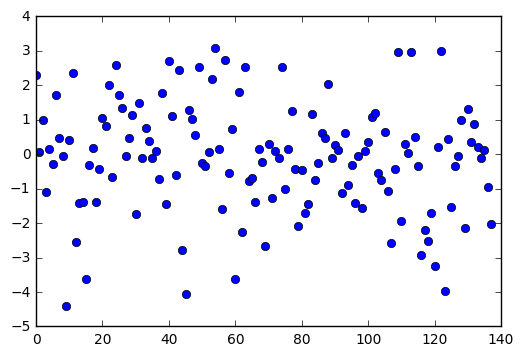

Saved age diagrams as output/mean_var_mean_std_hist200_idk__BaggingBoost_n_est52_DefaultTree*.png
======= Sorted age predictions for test data (to visualize the predictions) ==========


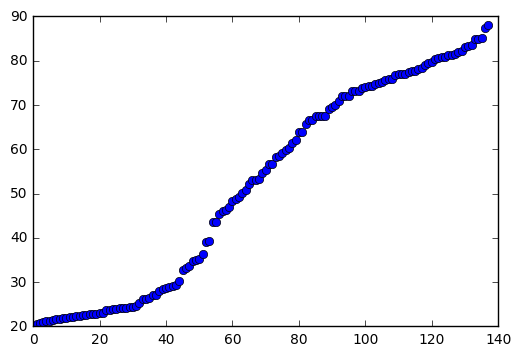

 ========= x ========== 
[[  1.50725930e+09   1.22970297e+06   1.17935264e+05 ...,   8.34532374e-01
   -4.70503597e+00   4.97122302e+00]
 [  1.51397922e+09   1.24338078e+06   1.19807807e+05 ...,  -2.16546763e+00
   -4.70503597e+00  -4.02877698e+00]
 [  1.52006085e+09   1.25454241e+06   1.20887034e+05 ...,   5.83453237e+00
    3.29496403e+00  -2.02877698e+00]
 ..., 
 [  1.52169988e+09   1.24241415e+06   1.19049472e+05 ...,  -1.16546763e+00
   -2.70503597e+00   4.97122302e+00]
 [  1.52123657e+09   1.25053893e+06   1.20567508e+05 ...,  -2.16546763e+00
    5.29496403e+00   4.97122302e+00]
 [  1.53099490e+09   1.25340495e+06   1.20335422e+05 ...,  -1.01654676e+01
   -1.07050360e+01  -1.00287770e+01]]

 ========= y_t_pred ========== 
[ 62.11538462  75.61538462  53.15384615  80.76923077  79.42307692
  75.94230769  53.38461538  53.          67.53846154  50.88461538  22.25
  56.57692308  69.65384615  28.57692308  21.55769231  63.94230769
  22.88461538  77.73076923  81.40384615  83.19230769  81.

In [17]:
doStuff(n_est=52)

## Histogram deviation from mean

The following diagram shows the difference of 6 histograms from the median count per intensity. It shows typical histograms for young, adult and old ages - in blue, yellow and green respectively.

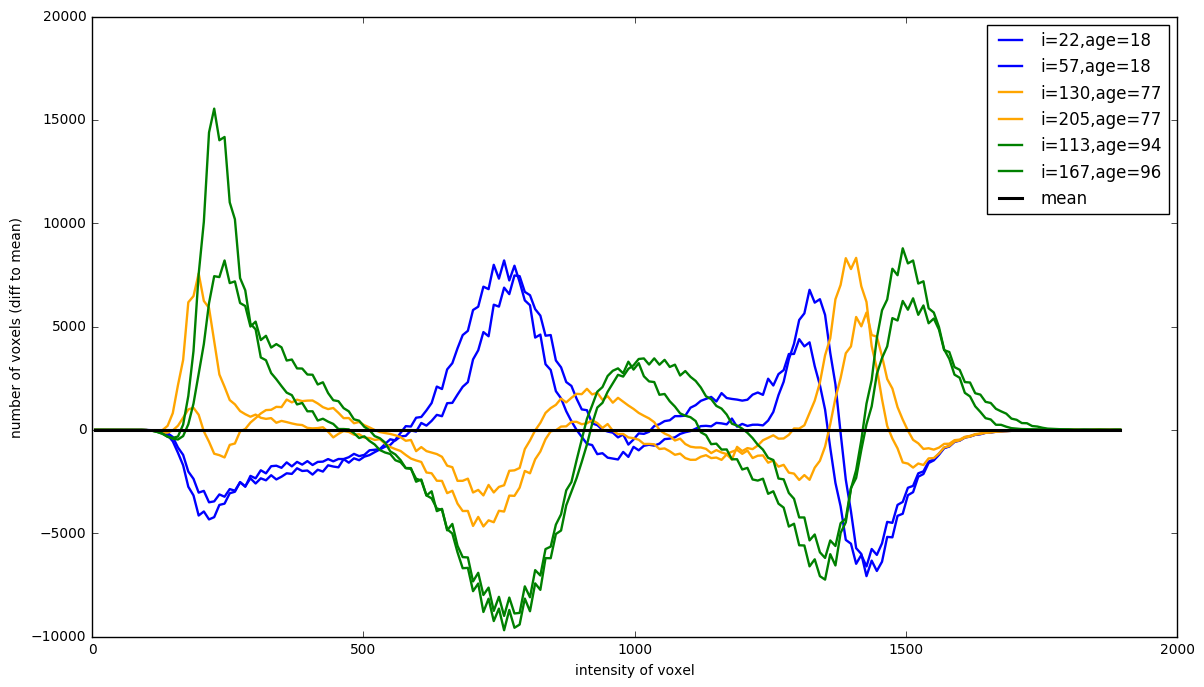

In [18]:
plt.clf()
g = "-adaboost-hist" + str(space)
fig = plt.figure(1)
fig.set_size_inches(14,8)
sortI = range(0,n_max)
sortI.sort(key=lambda i:y[i])
for si,i in enumerate(sortI[:2] + sortI[205:207] + sortI[-2:]):
    s = "i=%s,age=%s" % (i,y[i])
    c = "blue" if y[i] <= 25 else ("orange" if (23<= y[i] < 90) else "green")
    plt.plot(sbins,x[i,iHist:],label=s,color=c,linewidth=1.7)
plt.plot(sbins,x[0,iHist:]*0,label="mean",color="black",linewidth=2.2)
plt.ylabel("number of voxels (diff to mean)")
plt.xlabel("intensity of voxel")
plt.legend(loc='upper right')
plt.savefig("gray-density-patients-by-age"+g+".png")
plt.show()

The differences in the graphs are visible. Indeed, plotting Lasso Coefficients of a former prediction shows how Lasso used detected and used those differences.

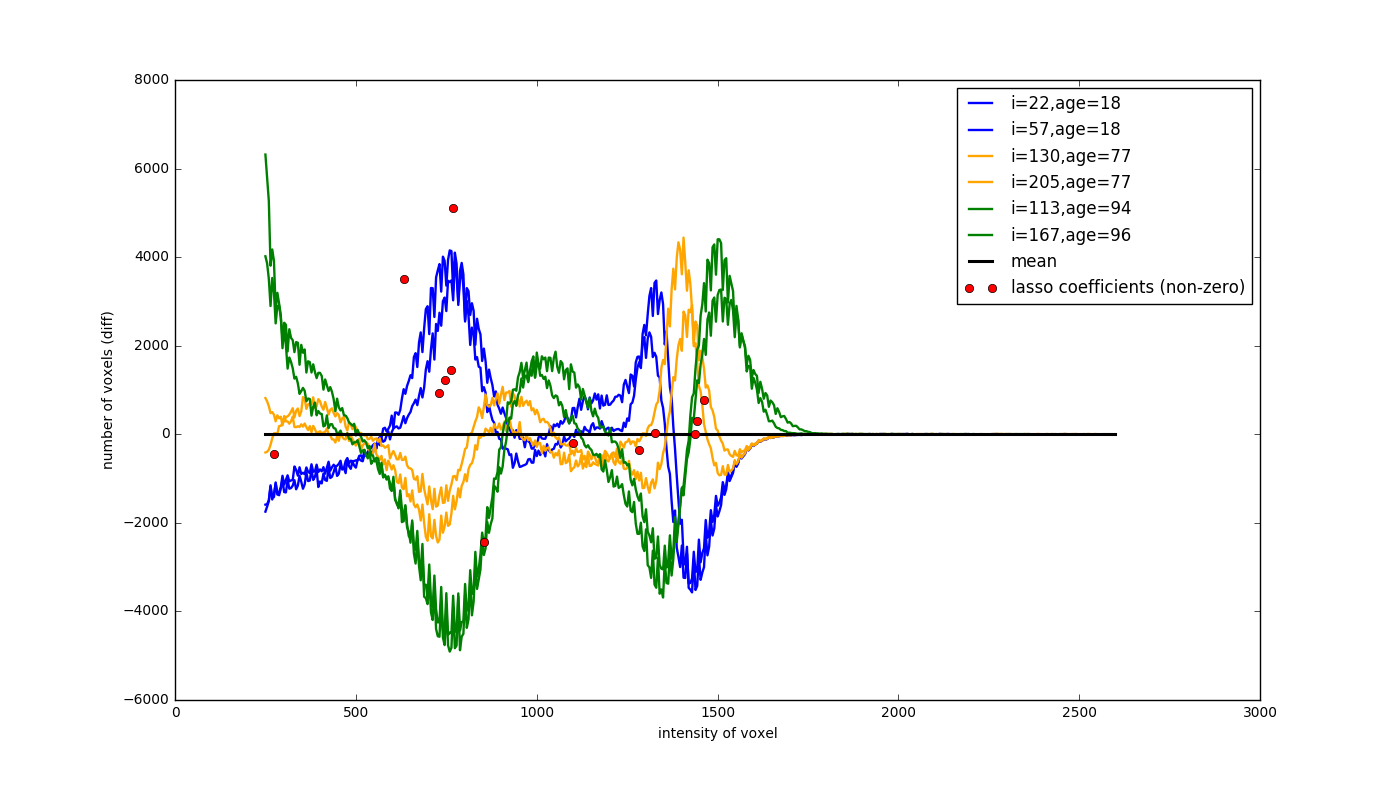

In [21]:
Image(filename='gray-density-patients-by-agediff_to_mean_.png')

## More diagrams

All histograms in difference ploted ina single diagram. Very interesting! (It's a big image. Zoom it!)

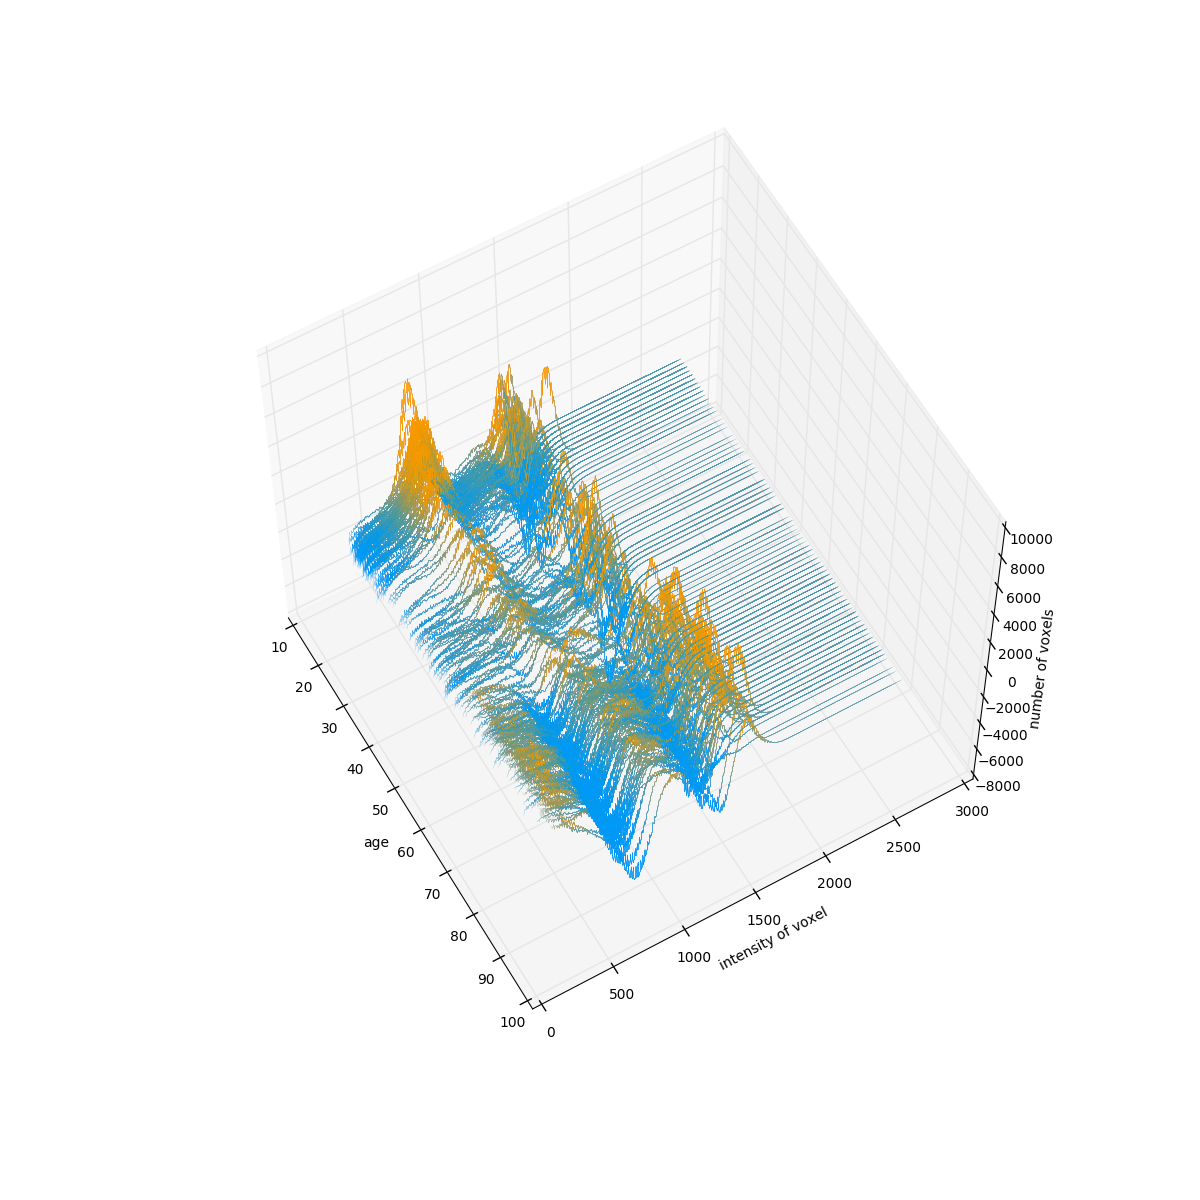

In [24]:
Image("all-histograms-by-age_FULL.png")

A few original histograms on logarithmic scale. (thus without difference from average)

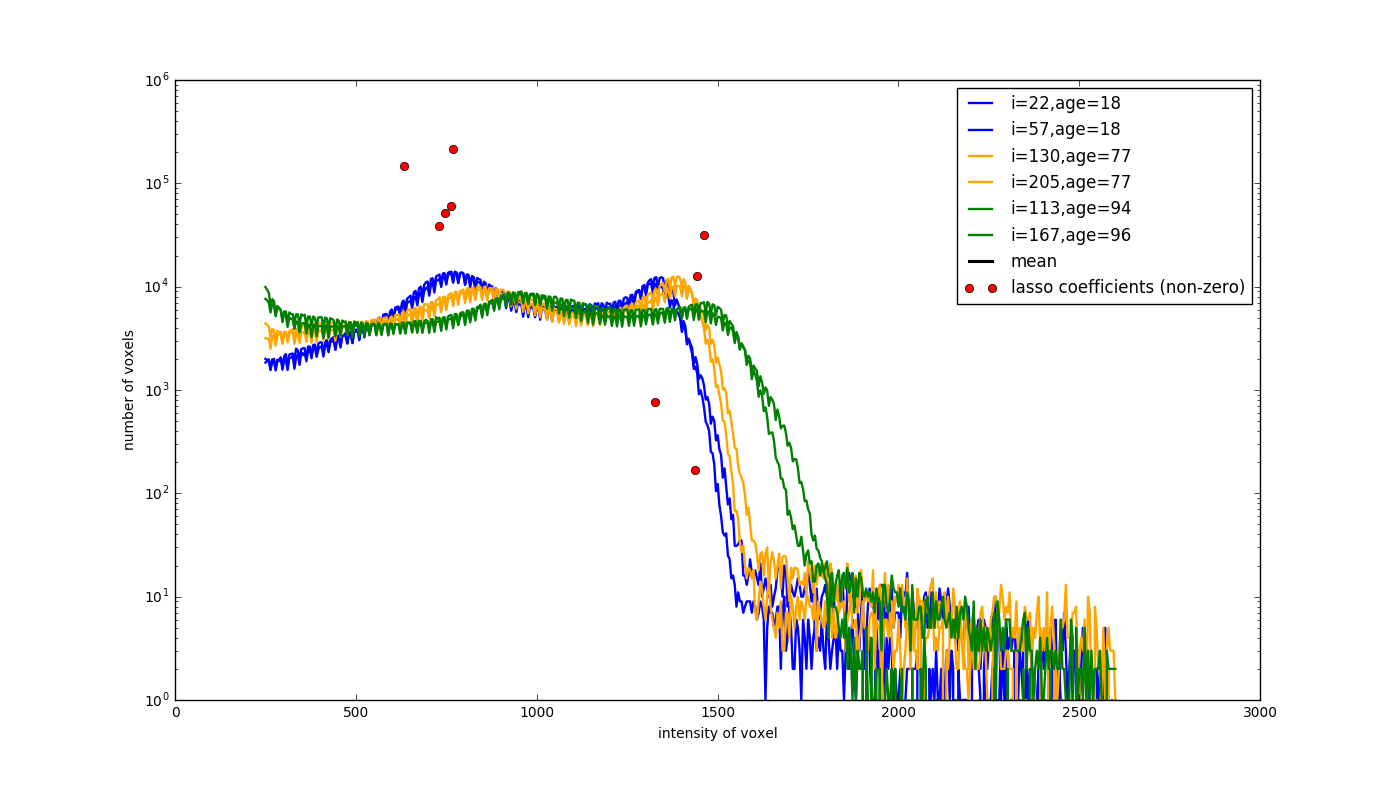

In [25]:
Image("gray-density-patients-by-age_logscale.png")